# What drives the price of a used car?
<center>
    <img src = ../images/kurt.jpeg width = 35%/>
</center>

## Project Overview: Predicting Used Car Prices Using CRISP-DM Framework

### Introduction
In the highly competitive used car market, accurate pricing is crucial for maximizing profits, attracting customers, and managing inventory effectively. This project aims to leverage data analytics and machine learning to identify key drivers of used car prices and develop a predictive model to forecast these prices accurately. This will enable used car business to make informed pricing decisions, enhance customer trust, and improve overall business performance.

### CRISP-DM Framework
Using the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework to guide this project. This widely adopted methodology provides a structured approach to data mining and ensures systematic and efficient analysis. The CRISP-DM process consists of six phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment.
<center>
    <img src = ../images/crisp.png width = 35%/>
</center>

## Business Understanding

The used car market is highly dynamic, influenced by a variety of factors ranging from economic conditions to consumer preferences. For this business, accurately predicting used car prices is crucial for several reasons:

- <b>Inventory Management:</b> Knowing the right price helps in maintaining optimal inventory levels by ensuring cars are neither overstocked nor understocked.
- <b>Sales Strategy:</b> Accurate pricing can enhance competitiveness, attracting more customers and increasing sales volumes.
- <b>Customer Trust:</b> Transparent and fair pricing builds customer trust and loyalty.
- <b>Financial Planning:</b> Reliable price predictions aid in better financial forecasting and budgeting.

Given these aspects, the primary goal is to identify the key drivers that significantly influence the prices of used cars. Understanding these drivers will enable the business to develop a robust pricing strategy, improve decision-making, and enhance overall business performance.

### Objectives

- <b>Identify Key Price Drivers:</b> Determine the primary factors that impact used car prices, this includes both numerical and categorical attributes (e.g., mileage, age, brand, model, condition, etc.)
- <b>Develop a Predictive Model:</b> Create a predictive model that can accurately forecast the prices of used cars based on the identified key drivers. This model should be reliable, scalable, and easy to integrate into the existing business processes.
- <b>Enhance Pricing Strategy:</b> Utilize the insights from the predictive model to refine the pricing strategy. This involves setting competitive prices that reflect the true value of the cars while maximizing the profit margins.
- <b>Support Strategic Decision-Making:</b> Provide actionable insights to support strategic decisions related to procurement, sales, and marketing. This includes understanding seasonal trends, identifying high-demand vehicle types, and targeting specific customer segments.
- <b>Improve Customer Experience:</b> Offer transparent and fair pricing to customers, thereby enhancing their buying experience and building long-term relationships.
- <b>Optimize Inventory Management:</b> Use price predictions to manage inventory more effectively, ensuring the right mix of vehicles is available to meet customer demand without overstocking or understocking.

By achieving these objectives, the business aims to gain a competitive edge in the used car market, improve operational efficiency, and drive sustainable growth.

## Data Understanding
In the Data Understanding phase, explored and familiarized with the dataset comprising 426,880 used car listings. This involved identifying key variables such as price, year, odometer readings, and categorical attributes like manufacturer, model, condition, etc.. Initial data exploration allowed to assess data quality, distribution, and relationships between variables, laying the groundwork for subsequent data preparation and modeling phases within the CRISP-DM framework.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

### Data Collection
The dataset comprising 426,880 used car listings was sourced from Kaggle, a platform known for hosting diverse datasets contributed by the community.

In [7]:
# Load the data set
cars = pd.read_csv('../data/vehicles.csv')

### Data Description

The dataset contains information on 426,880 used cars, with 18 attributes detailing various aspects of each vehicle. Below is a detailed description of each column:

1. **id:** A unique identifier for each car listing.
2. **region:** The geographic region where the car is listed.
3. **price:** The listed price of the car in dollars.
4. **year:** The manufacturing year of the car.
5. **manufacturer:** The manufacturer or brand of the car (e.g., Ford, Toyota).
6. **model:** The model name of the car.
7. **condition:** The condition of the car (e.g., new, like new, excellent, good, fair, salvage).
8. **cylinders:** The number of cylinders in the car's engine.
9. **fuel:** The type of fuel the car uses (e.g., gas, diesel, electric, hybrid).
10. **odometer:** The mileage of the car (distance traveled in miles).
11. **title_status:** The status of the car's title (e.g., clean, salvage, rebuilt).
12. **transmission:** The type of transmission (e.g., automatic, manual).
13. **VIN:** The Vehicle Identification Number, a unique code used to identify individual motor vehicles.
14. **drive:** The type of drivetrain (e.g., 4wd, fwd, rwd).
15. **size:** The size category of the car (e.g., compact, mid-size, full-size).
16. **type:** The type or category of the car (e.g., sedan, SUV, truck).
17. **paint_color:** The exterior color of the car's paint.
18. **state:** The state where the car is listed.

In [9]:
# Display data set info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Exploration

In the Data Exploration phase, conducted a thorough analysis to uncover patterns, relationships, and insights within the dataset. 
Key activities included:

- **Descriptive Statistics:** Calculated summary statistics for each numerical feature, such as mean, median, standard deviation, minimum, and maximum values. This provided a high-level overview of the data distribution and central tendencies.
- **Distribution Analysis:** Visualized the distributions of key variables (e.g., price, year, odometer) using histograms, density and box plots to understand their spread and identify any skewness or kurtosis. This helped in detecting potential outliers and understanding the general data shape.
- **Correlation Analysis:** Computed correlation coefficients between numerical variables to identify linear relationships. Visualized these correlations using heatmaps and SNS Pairplot, which highlighted significant correlations (e.g., between year and price, odometer and price).
- **Missing Values Analysis:** Identified columns with missing values and calculated the proportion of missing data for each column based on make and model. Visualized missing data patterns using heatmaps to understand the extent and distribution of missingness across the dataset.
- **Categorical Data Analysis:** Examined the distribution of categorical variables (e.g., manufacturer, fuel, transmission) using count plots. This analysis provided insights into the most common categories and their frequencies.
- **Outlier Detection:** Identified outliers in numerical features by visualizing box plots and hist plots. Assessed the potential impact of these outliers on the analysis and modeling process.
- **Bivariate Analysis:** Explored relationships between pairs of variables (e.g., price vs. year, price vs. odometer) using scatter plots and box plots. This helped in understanding how different features interact and influence the target variable (price).

These exploratory analyses laid the foundation for subsequent data preparation and modeling steps, ensuring a comprehensive understanding of the dataset and guiding informed decisions throughout the project.

#### Removing Duplicates

In [12]:
# Drop id, VIN, region, state column, deemed unimportant, 
# region and state was added in the analysis in prior iteration but we got better results without them.
cars_cleaned = cars.drop(columns=['id', 'VIN', 'region', 'state'])

In [13]:
# Display total rows and columns
total_rows, total_columns = cars_cleaned.shape
print(f"Total rows: {total_rows}")
print(f"Total columns: {total_columns}")
cars_cleaned.columns

Total rows: 426880
Total columns: 14


Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color'],
      dtype='object')

In [14]:
# Find duplicate rows
duplicate_rows = cars_cleaned[cars_cleaned.duplicated()]

# Print duplicate rows
duplicate_rows

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver


In [15]:
# Drop Duplicates
cars_cleaned.drop_duplicates(inplace=True)

In [16]:
cars_cleaned.shape

(248303, 14)

#### Identify and drop rows with all data as NaN except price + drop data where Price = 0

In [18]:
# Identify rows where all columns except 'price' are NaN
columns_to_check = cars_cleaned.columns.difference(['price'])
rows_to_delete = cars_cleaned[columns_to_check].isnull().all(axis=1)

# Delete rows where all specified columns are NaN
cars_cleaned = cars_cleaned[~rows_to_delete]

# Reset index if needed
cars_cleaned.reset_index(drop=True, inplace=True)

# Print the cleaned DataFrame
cars_cleaned.shape

(248250, 14)

In [19]:
cars_cleaned.query('price == 0').shape

(17484, 14)

In [20]:
# Drop rows where price == 0
cars_cleaned = cars_cleaned[cars_cleaned['price'] != 0]

# Reset index if needed
cars_cleaned.reset_index(drop=True, inplace=True)
cars_cleaned.shape

(230766, 14)

In [21]:
# Display count of missing values
cars_cleaned.isnull().sum()

price                0
year               628
manufacturer     10270
model             3353
condition        87865
cylinders        79394
fuel              1413
odometer          1201
title_status      3834
transmission       980
drive            64639
size            147268
type             58476
paint_color      67438
dtype: int64

In [22]:
# Identify rows where both manufacturer and model are null (found no data)
cars_cleaned[cars_cleaned['manufacturer'].isnull() & cars_cleaned['model'].isnull()].shape

(0, 14)

In [23]:
# Identify rows where model is Nan
cars_cleaned[cars_cleaned['model'].isnull()].shape

(3353, 14)

In [24]:
# Identify rows where manufacturer is Nan
cars_cleaned[cars_cleaned['manufacturer'].isnull()].shape

(10270, 14)

**Update Nan values in Manufacturer based on model**
- Create a Mapping from model to manufacturer: Use the existing rows where both model and manufacturer are present to create a dictionary mapping.
- Fill Missing manufacturer Values: Use this mapping to fill in the missing manufacturer values in the DataFrame.

In [26]:
# Create a mapping from model to manufacturer using non-null values
model_to_manufacturer = cars_cleaned.dropna(subset=['manufacturer', 'model']).set_index('model')['manufacturer'].to_dict()

# Function to fill missing manufacturer based on model
def fill_manufacturer(row, mapping):
    if pd.isnull(row['manufacturer']) and pd.notnull(row['model']):
        return mapping.get(row['model'], row['manufacturer'])
    return row['manufacturer']

# Apply the function to each row in the DataFrame
cars_cleaned['manufacturer'] = cars_cleaned.apply(fill_manufacturer, axis=1, mapping=model_to_manufacturer)

cars_cleaned[cars_cleaned['manufacturer'].isnull()].shape

(9726, 14)

**drop rows with missing values in model**

In [28]:
# Drop rows with missing 'model' values
cars_cleaned.dropna(subset=['model'], inplace=True)

In [29]:
# Display counts of missing values
cars_cleaned.isnull().sum()

price                0
year               628
manufacturer      9726
model                0
condition        86444
cylinders        77785
fuel              1413
odometer          1196
title_status      3826
transmission       973
drive            63075
size            144999
type             56783
paint_color      65785
dtype: int64

In [30]:
# Display size of cars_cleaned dataset
cars_cleaned.shape

(227413, 14)

#### Add a New Feature - make_model (combination of manufaturer and model)

In [32]:
# Create 'make_model' column based on the conditions
cars_cleaned['make_model'] = np.where(
    cars_cleaned['manufacturer'].isnull() & cars_cleaned['model'].notnull(), 
    cars_cleaned['model'],
    np.where(
        cars_cleaned['model'].isnull() & cars_cleaned['manufacturer'].notnull(), 
        cars_cleaned['manufacturer'], 
        np.where(
            cars_cleaned['manufacturer'].notnull() & cars_cleaned['model'].notnull(), 
            cars_cleaned['manufacturer'] + '-' + cars_cleaned['model'],
            np.nan
        )
    )
)

In [33]:
# Display size and columns in cars_cleaned dataset
cars_cleaned.shape, cars_cleaned.columns

((227413, 15),
 Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
        'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
        'type', 'paint_color', 'make_model'],
       dtype='object'))

In [34]:
# Drop 'manufacturer' and 'model' columns
cars_cleaned.drop(columns=['manufacturer', 'model'], inplace=True)

In [35]:
# Display size and columns in cars_cleaned dataset
cars_cleaned.shape, cars_cleaned.columns

((227413, 13),
 Index(['price', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
        'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
        'make_model'],
       dtype='object'))

#### Distribution Analysis: 
Visualized the distributions of key variables (e.g., price, year, odometer) using histograms, density plots and box plots to understand their spread and identify any skewness or kurtosis. This helped in detecting potential outliers and understanding the general data shape.

In [37]:
numerical_variables = cars_cleaned.select_dtypes(include=['int','float']).columns.tolist()
print(numerical_variables)

['price', 'year', 'odometer']


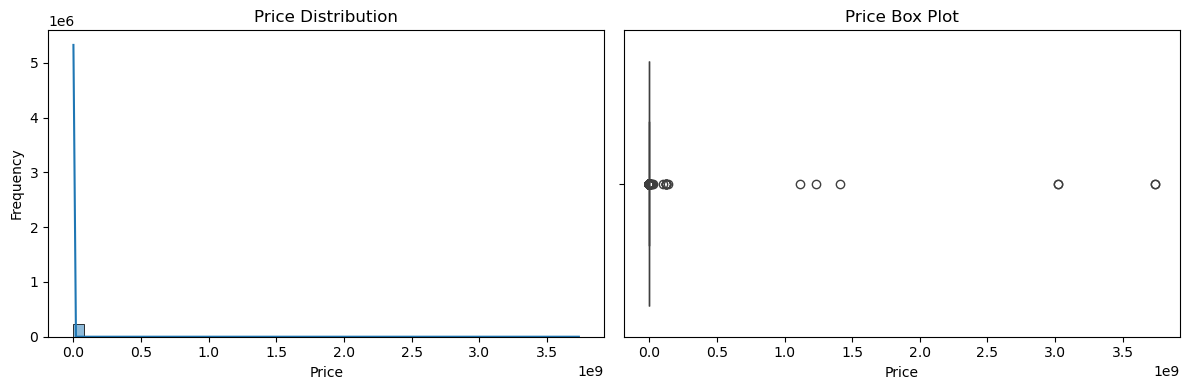

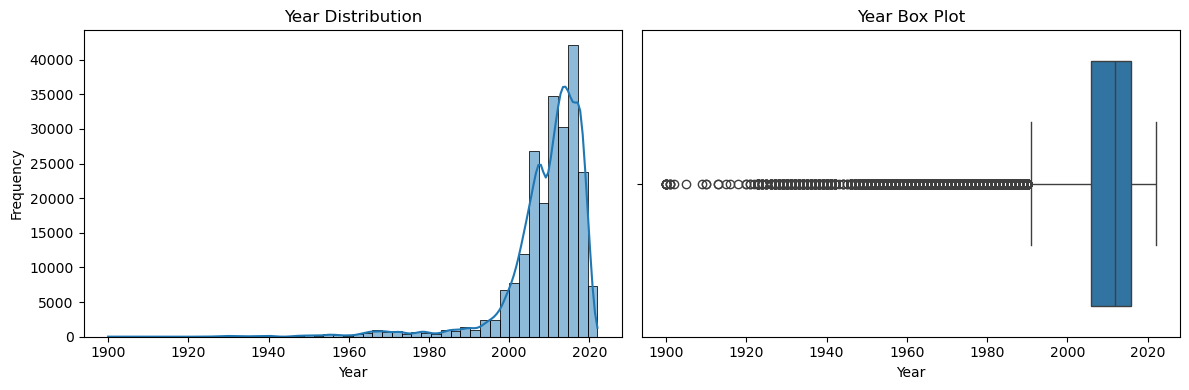

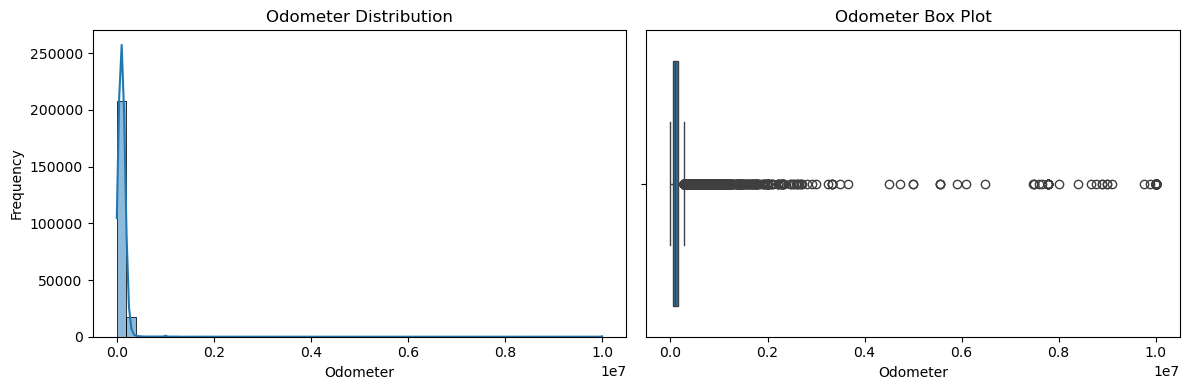

In [38]:
# Loop through each numerical variable and create histograms and density plots
for col in numerical_variables:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(cars_cleaned[col].dropna(), kde=True, bins=50)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    
    # Density plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cars_cleaned[col].dropna())
    plt.title(f'{col.capitalize()} Box Plot')
    plt.xlabel(col.capitalize())
    
    plt.tight_layout()
    plt.show()

In [39]:
# Distribution plot suggests outliers in all three variables: price, year and odometer 

#### Outlier Detection
Identified outliers in numerical features by visualizing box plots and scatter plots. Assessed the potential impact of these outliers on the analysis and modeling process.

**Handling Outliers:** remove, transforming (e.g., using log transformation), or cap outliers (set a limit on extreme values). Removing Outliers here.

In [41]:
# Function to identify outliers using IQR
def identify_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Identify outliers in each feature
outliers_price = identify_outliers(cars_cleaned, 'price')
outliers_year = identify_outliers(cars_cleaned, 'year')
outliers_odometer = identify_outliers(cars_cleaned, 'odometer')

print("Outliers in Price:\n", outliers_price)
print("Outliers in Year:\n", outliers_year)
print("Outliers in Odometer:\n", outliers_odometer)

Outliers in Price:
         price    year  condition    cylinders    fuel  odometer title_status  \
79      43990  2019.0       good          NaN     gas    4362.0        clean   
127     52990  2020.0       good          NaN     gas      79.0        clean   
171     58977  2019.0        NaN          NaN     gas   66368.0        clean   
187     53000  2006.0        NaN          NaN  diesel  160322.0        clean   
206     45900  2017.0        NaN  6 cylinders     gas   36083.0        clean   
...       ...     ...        ...          ...     ...       ...          ...   
230706  45000  1970.0        NaN          NaN     gas    4451.0        clean   
230707  55000  2020.0   like new  6 cylinders     gas    7500.0        clean   
230719  74900  2019.0  excellent  8 cylinders  diesel   30290.0        clean   
230735  45900  2018.0        NaN          NaN     gas   26892.0        clean   
230763  54999  2017.0        NaN          NaN     gas  119000.0        clean   

       transmission

In [42]:
# Removing outliers
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df_cleaned

# Clean the dataset by removing outliers
for feature in ['price', 'year', 'odometer']:
    cars_cleaned = remove_outliers(cars_cleaned, feature)

In [43]:
# Display total rows and columns
total_rows, total_columns = cars_cleaned.shape
print(f"Total rows: {total_rows}")
print(f"Total columns: {total_columns}")
cars_cleaned.columns

Total rows: 202090
Total columns: 13


Index(['price', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
       'make_model'],
      dtype='object')

**Plots after outlier removal**

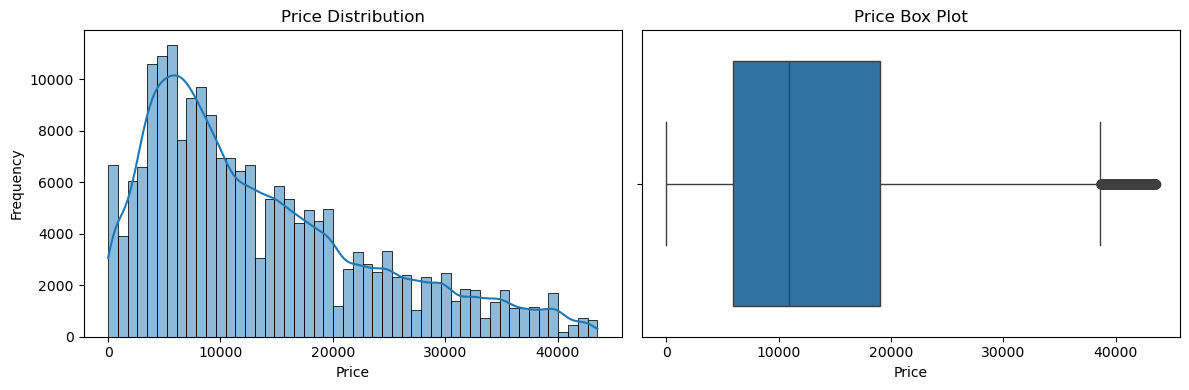

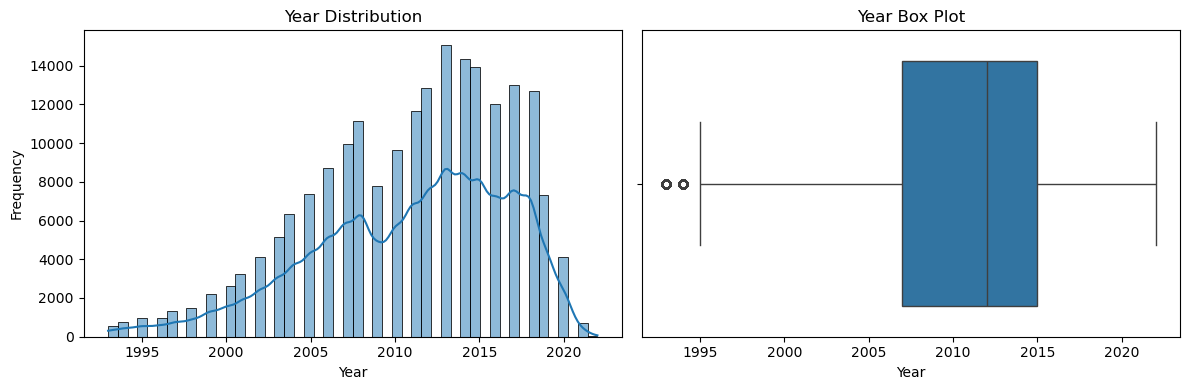

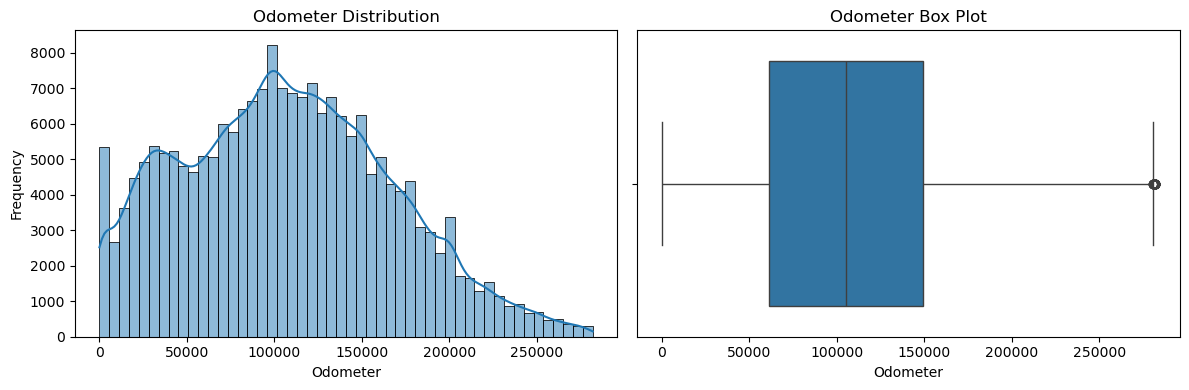

In [45]:
# Loop through each numerical variable and create histograms and density plots again after removing outliers
for col in numerical_variables:
    plt.figure(figsize=(12, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(cars_cleaned[col].dropna(), kde=True, bins=50)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    
    # Density plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cars_cleaned[col].dropna())
    plt.title(f'{col.capitalize()} Box Plot')
    plt.xlabel(col.capitalize())
    
    plt.tight_layout()
    plt.show()

In [46]:
# Distribution looks more uniform after outlier removal

#### Missing Values Analysis & Handling
During the Data Understanding and Preparation phases, identifying and handling missing values is crucial to ensure the integrity and accuracy of our dataset. 
- **Identifying Columns with Missing Values:**
Identified columns in the dataset that contained missing values. This step helps us understand which features may require imputation or further investigation.
- **Calculating Percentage of Missing Data:**
For each identified column, calculated the percentage of missing data. This quantification allowed to prioritize columns for imputation or decide if columns with extensive missing data should be excluded from analysis.
- **Visualizing Missing Data Patterns:**
To visualize the extent and distribution of missingness across the dataset, used heatmaps. Heatmaps provide a clear graphical representation where missing values are marked distinctively, to discern any patterns or clusters of missing data.

In [49]:
# Display counts of missing values
cars_cleaned.isnull().sum()

price                0
year                 0
condition        76431
cylinders        68471
fuel              1158
odometer             0
title_status      3472
transmission       771
drive            55831
size            128127
type             49080
paint_color      57916
make_model           0
dtype: int64

In [50]:
# Identify columns with missing values
columns_with_missing = cars_cleaned.columns[cars_cleaned.isnull().any()]

# Calculate percentage of missing values for each column
missing_percentage = (cars_cleaned[columns_with_missing].isnull().mean() * 100)
print("Percentage of missing values in each column:")

for col, percentage in missing_percentage.items():
    print(f"{col}: {percentage:.2f}%")

Percentage of missing values in each column:
condition: 37.82%
cylinders: 33.88%
fuel: 0.57%
title_status: 1.72%
transmission: 0.38%
drive: 27.63%
size: 63.40%
type: 24.29%
paint_color: 28.66%


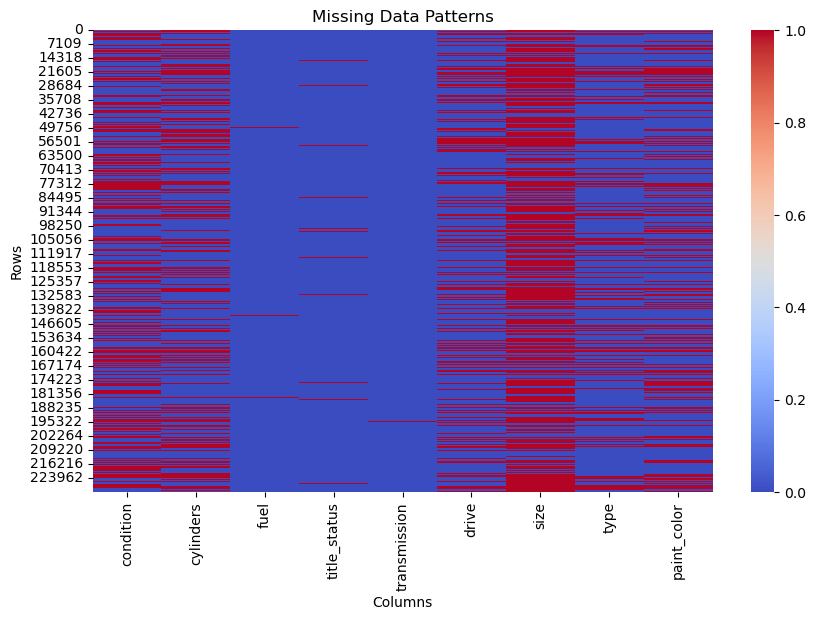

In [51]:
# Visualize missing data patterns using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cars_cleaned[columns_with_missing].isnull(), cmap='coolwarm')
plt.title('Missing Data Patterns')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [52]:
columns_with_missing

Index(['condition', 'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color'],
      dtype='object')

**Update Nan values based on make_model**
- For each column in columns_with_missing, apply groupby('make_model') to group the data by make_model.
- Use transform(lambda x: x.fillna(x.mode()[0])) to fill NaN values within each group (make_model) with the most frequent value (mode).

In [54]:
# Group by 'make_model' and fill NaN values in each column
for col in columns_with_missing:
    cars_cleaned[col] = cars_cleaned.groupby('make_model')[col].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
    print('updated col:', col)

cars_cleaned.isnull().sum()

updated col: condition
updated col: cylinders
updated col: fuel
updated col: title_status
updated col: transmission
updated col: drive
updated col: size
updated col: type
updated col: paint_color


price               0
year                0
condition        7842
cylinders        9173
fuel              776
odometer            0
title_status     1386
transmission       46
drive            6514
size            22147
type             4211
paint_color      6527
make_model          0
dtype: int64

In [55]:
# Calculate percentage of missing values for each column after the data update
missing_percentage = (cars_cleaned[columns_with_missing].isnull().mean() * 100)
print("Percentage of missing values in each column:")

for col, percentage in missing_percentage.items():
    print(f"{col}: {percentage:.2f}%")

Percentage of missing values in each column:
condition: 3.88%
cylinders: 4.54%
fuel: 0.38%
title_status: 0.69%
transmission: 0.02%
drive: 3.22%
size: 10.96%
type: 2.08%
paint_color: 3.23%


In [56]:
# Significant improvement in dataset missing values, after values are updated w.r.t make_model
# Drop remaining null values from the dataset

In [57]:
# Display rows with Nan values
cars_cleaned[cars_cleaned.isnull().any(axis=1)].shape

(23311, 13)

In [58]:
# Drop all nan rows for further analysis, it seems useless updating randon most frequent values
cars_cleaned.dropna(inplace=True)

# If you want to reset the index after dropping rows
cars_cleaned.reset_index(drop=True, inplace=True)

In [59]:
# Check for any remaining missing values
cars_cleaned.isnull().sum()

price           0
year            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
make_model      0
dtype: int64

In [60]:
# Display final dataset after handling missing values
cars_cleaned.shape, cars_cleaned.columns

((178779, 13),
 Index(['price', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
        'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color',
        'make_model'],
       dtype='object'))

#### Categorical Data Analysis: 
Examined the distribution of categorical variables (e.g., manufacturer, fuel, transmission) using count plots. This analysis provided insights into the most common categories and their frequencies.

In [62]:
# Identify categorical columns
categorical_cols = cars_cleaned.select_dtypes(include=['object']).columns.tolist()

In [63]:
# Display categories in each feature and value_counts()
for var in categorical_cols:
    print(cars_cleaned[var].value_counts(), '\nlenght:', len(cars_cleaned[var].unique()), '\n\n')

condition
excellent    114182
good          45964
like new      13048
fair           4573
new             598
salvage         414
Name: count, dtype: int64 
lenght: 6 


cylinders
4 cylinders     71970
6 cylinders     63975
8 cylinders     39541
5 cylinders      1444
other             779
10 cylinders      608
3 cylinders       397
12 cylinders       65
Name: count, dtype: int64 
lenght: 8 


fuel
gas         164653
diesel        6914
other         4350
hybrid        2386
electric       476
Name: count, dtype: int64 
lenght: 5 


title_status
clean         169660
rebuilt         5047
salvage         2674
lien            1110
missing          201
parts only        87
Name: count, dtype: int64 
lenght: 6 


transmission
automatic    163472
manual        11159
other          4148
Name: count, dtype: int64 
lenght: 3 


drive
fwd    75547
4wd    74280
rwd    28952
Name: count, dtype: int64 
lenght: 3 


size
full-size      83084
mid-size       61576
compact        30939
sub-compact     318

In [64]:
# print categorical columns
print(categorical_cols)

['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'make_model']


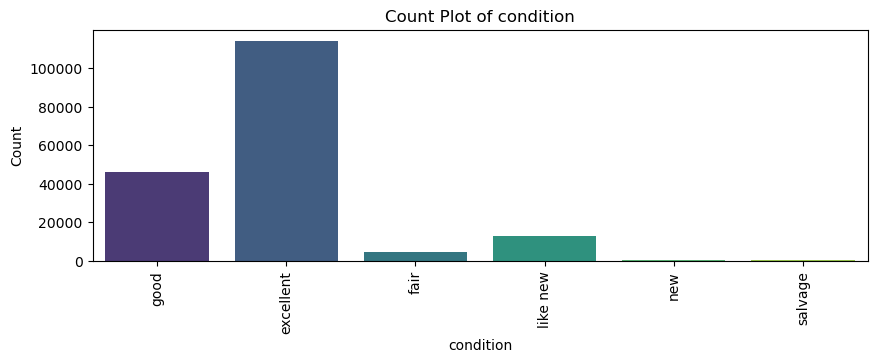

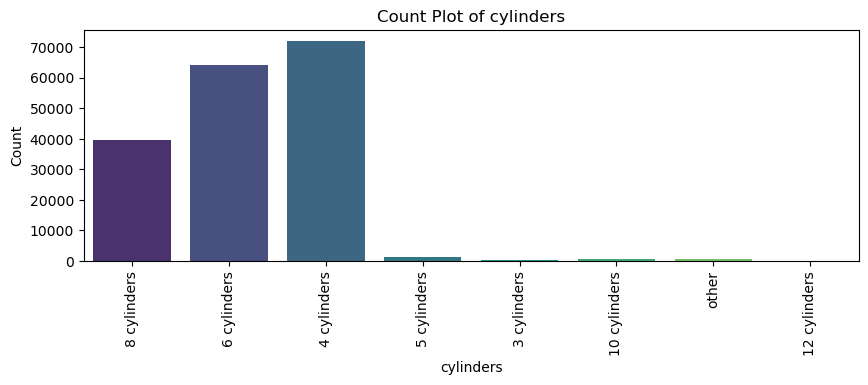

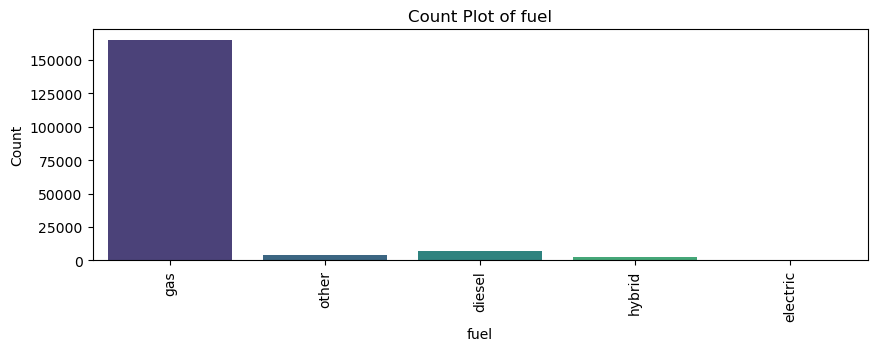

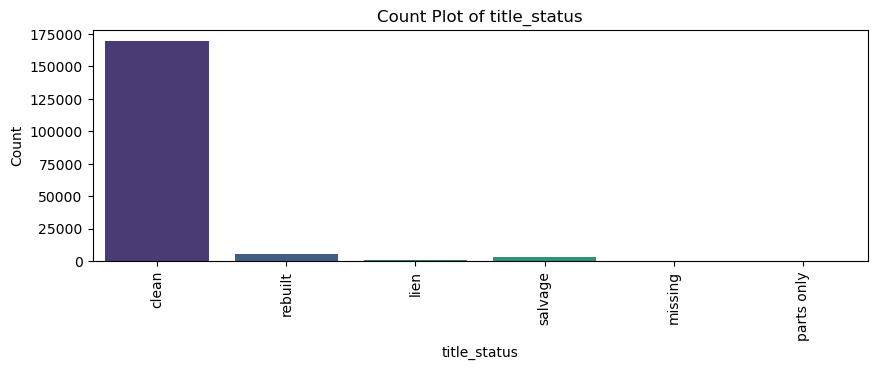

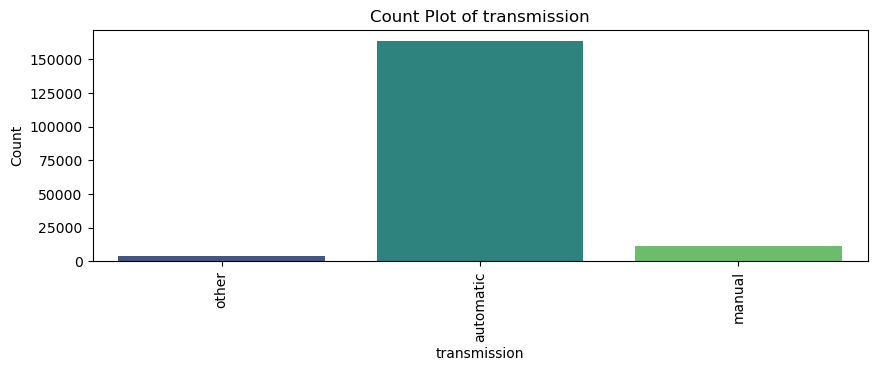

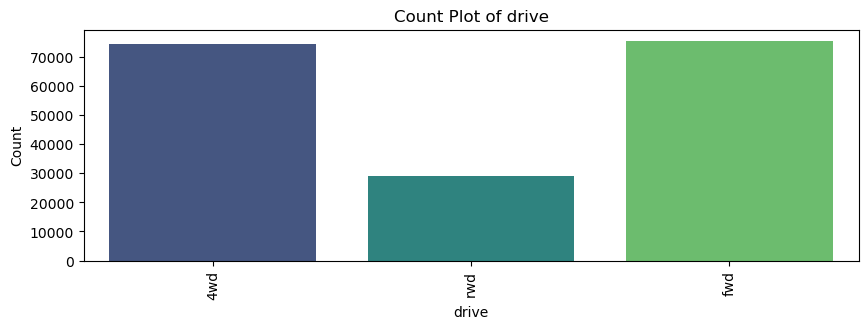

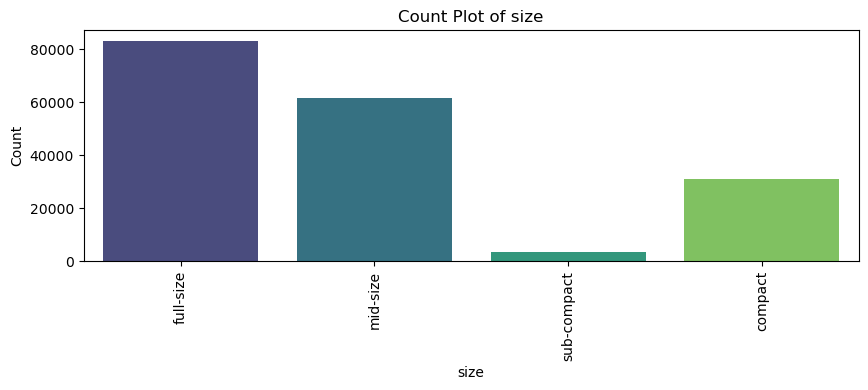

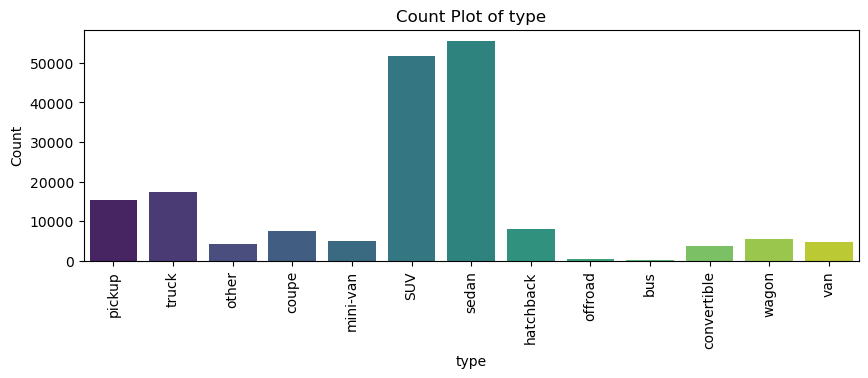

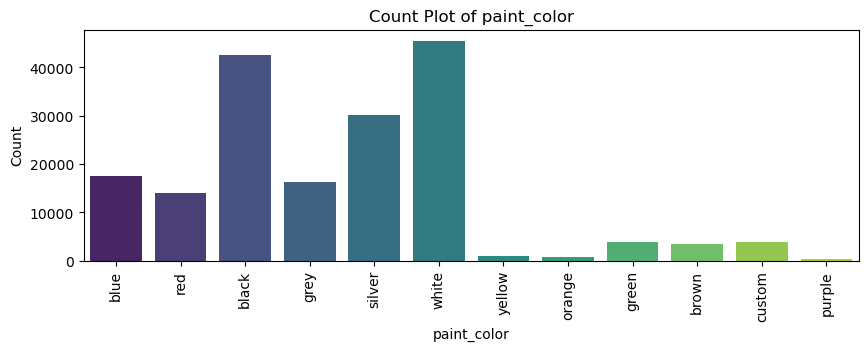

In [65]:
# Select columns for SNS countplot) excluding make_model
selected_vars = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']

# Loop through each selected variable and plot histograms to view most popular categories and categorical col distributions
for var in selected_vars:
    plt.figure(figsize=(10, 3))
    sns.countplot(data=cars_cleaned, x=var, palette='viridis')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Count Plot of {var}')
    plt.xticks(rotation=90)
    plt.show()

**Categorical features Transformations:**
- Target Encoding: make_model
- Ordinal Encoding: condition, cylinders, title_status, drive, size, 
- One Hot Encoding: Fuel, transmission, type, paint_color

#### Descriptive Statistics

Key numerical features such as price, year, and odometer are analyzed.

**Transforming year column into vehicle_age and drop year column**
- **New feature: vehicle_age** was derived or modified from existing year to enhance predictive power, creating a derived feature like "vehicle age" from the difference between the current year and the year of manufacture could provide deeper insights into pricing dynamics based on depreciation.

In [68]:
# Adding new feature vehicle_age

from datetime import datetime

# Get the current year dynamically
current_year = datetime.now().year

# Create the derived feature 'vehicle_age'
cars_cleaned['vehicle_age'] = current_year - cars_cleaned['year']

# Drop year column
cars_cleaned.drop(columns=['year'], inplace=True)

# Display the updated DataFrame with the new feature
cars_cleaned.head()

,price,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,make_model,vehicle_age
0,22590,good,8 cylinders,gas,71229.0,clean,other,4wd,full-size,pickup,blue,chevrolet-silverado 1500,14.0
1,30990,good,8 cylinders,gas,41124.0,clean,other,4wd,full-size,pickup,red,toyota-tundra double cab sr,7.0
2,15000,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,ford-f-150 xlt,11.0
3,35000,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,mid-size,truck,grey,toyota-tacoma,5.0
4,29990,good,6 cylinders,gas,17302.0,clean,other,4wd,mid-size,pickup,red,chevrolet-colorado extended cab,8.0


In [69]:
cars_cleaned.describe()

,price,odometer,vehicle_age
count,178779.000000,178779.000000,178779.000000
mean,12903.993299,111144.037974,13.334178
std,9612.304203,58966.990119,5.710339
min,1.000000,0.000000,2.000000
25%,5500.000000,67874.500000,9.000000
50%,9999.000000,109164.000000,12.000000
75%,17995.000000,151000.000000,17.000000
max,43547.000000,282000.000000,31.000000


**summary for each statistics:**
- **Price:** The prices of vehicles in the dataset range from USD 1 to USD 43,547, with a mean price of USD 12,903.
- **Odometer:** The mileage of vehicles varies from 0 to 282,000 miles, with a mean odometer reading of 111,144 miles.
- **Vehicle Age:** The age of vehicles spans from 2 to 31 years, with a mean age of 13.3 years.

#### Bivariate Analysis
Explored relationships between pairs of variables (e.g., price vs. vehicle_age, price vs. odometer) using scatter plots. This helped in understanding how different features interact and influence the target variable (price).

**Covariance and Correlation Analysis:**
Computed correlation coefficients between numerical variables to identify linear relationships. Visualized these correlations using heatmaps, which highlighted significant correlations (between vehicle_age, price, odometer).

In [72]:
# Correlation Analysis of Numerical Variables
cars_cleaned.cov(numeric_only=True)

,price,odometer,vehicle_age
price,9.239639e+07,-2.726203e+08,-30536.032944
odometer,-2.726203e+08,3.477106e+09,193910.945437
vehicle_age,-3.053603e+04,1.939109e+05,32.607977


**Interpretation:**
**Covariance:**
- Positive covariance between price and odometer, indicating that as price increases, odometer tends to decrease.
- Negative covariance between price and vehicle_age, suggesting that as price increases, vehicle age tends to decrease slightly.
- Positive covariance between odometer and vehicle_age, indicating that higher mileage tends to correlate with older vehicles.

In [74]:
cars_cleaned.corr(numeric_only=True)

,price,odometer,vehicle_age
price,1.000000,-0.480974,-0.556318
odometer,-0.480974,1.000000,0.575879
vehicle_age,-0.556318,0.575879,1.000000


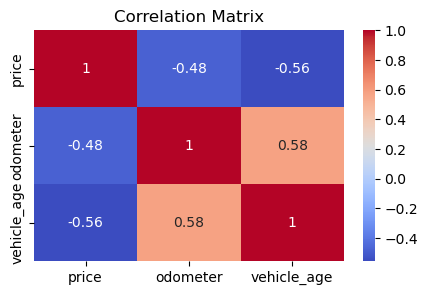

In [75]:
# Visualize correlations
plt.figure(figsize=(5, 3))
sns.heatmap(cars_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Interpretation:** **Correlation:**
- Moderate negative correlation (-0.48) between price and odometer, suggesting that higher prices correlate with lower odometer readings.
- Moderate negative correlation (-0.56) between price and vehicle_age, indicating that higher prices correlate with younger vehicles.
- Moderate positive correlation (0.59) between odometer and vehicle_age, suggesting that older vehicles tend to have higher mileage.

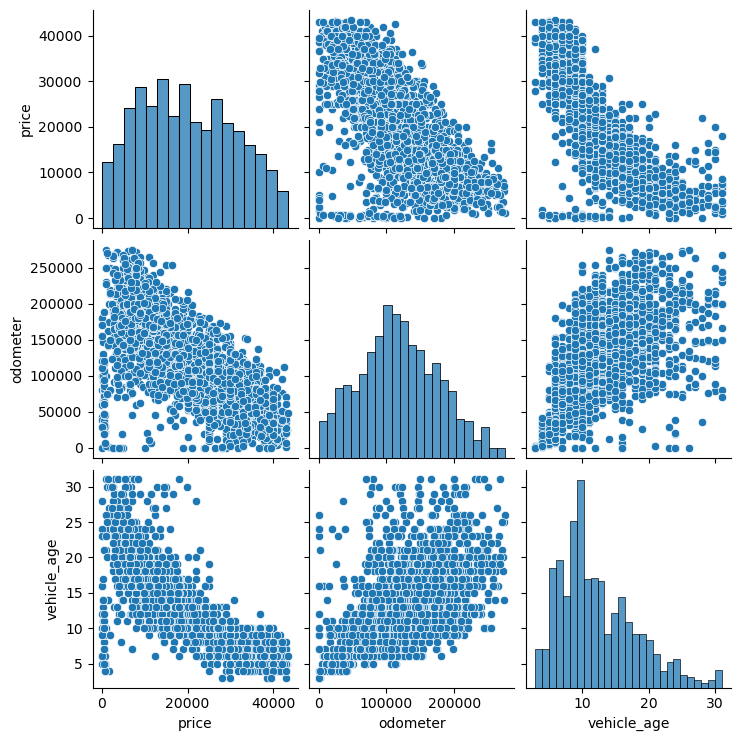

In [77]:
# SNS Pairplot is confounded by manufacturer and model, displaying specific manufacturer and model depicts the correlations correctly. 
sns.pairplot(cars_cleaned.query('make_model == "chevrolet-silverado 1500"'))

In [78]:
# Final Data for Data Preparation phase
cars_cleaned.shape, cars_cleaned.columns

((178779, 13),
 Index(['price', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
        'transmission', 'drive', 'size', 'type', 'paint_color', 'make_model',
        'vehicle_age'],
       dtype='object'))

## Data Preparation

In the Data Preparation phase, focused on transforming the raw dataset into a clean and structured format suitable for modeling. This phase is crucial for ensuring the accuracy and reliability of our predictive model. Here’s a detailed overview of the steps taken:

- **Data Cleaning:**
    - **Handling Missing Values:** Missing values were identified across various columns such as year, manufacturer, model, condition, cylinders, fuel type, odometer readings, title status, transmission type, drive type, size category, car type, paint color, and state.
    - **Handling Outliers:** remove, transform (e.g., using log transformation), or cap outliers (set a limit on extreme values). Ouliers were removed from year, odometer and price using IQR method.
    - **Remove duplicates** all duplicate values were dropped. 
    - **Handling incorrect data types** None required
    - **Handling inconsistent data** (example: age shouldn't be negative), None required
- **Split data into training and test sets:**
This partitioning ensured that the model could be trained on a subset of data and tested for optimal performance. The primary reason for performing a train/test split before feature engineering and modeling is to prevent data leakage and to ensure that the evaluation of your model is accurate and indicative of its performance on unseen data.
    - Prevention of Data Leakage
    - Accurate Evaluation
    - Ethical Modeling Practices
- **Feature Engineering / Data Transformation:**
    - **Normalization/Scaling:** Numerical features such as price, vehicle_age, and odometer readings were scaled using techniques like Min-Max scaling to bring them within a standardized range, optimizing the performance of machine learning algorithms that are sensitive to varying scales.
    - **Polynomial Features:** Numerical features such as price, vehicle_age, and odometer were transformed using Polynomial features fundction with degree 2.
    - **Encoding Categorical Variables:**
        - **Target Encoding:** make_model was encoded using target encoding.
        - **one-hot encoding:** fuel, transmission, type, paint_color were encoded using one-hot encoding to convert them into numerical format.
        - **Ordinal Encoding:** condition, cylinders, title_status, drive, size were encoding using ordinal encoding.
    - **New features** were derived or modified from existing ones to enhance predictive power.
        - For example, creating a derived feature like **"vehicle age"** from the difference between the current year and the year of manufacture could provide deeper insights into pricing dynamics based on depreciation.
        - **make_model** was created to combine manufacturer and model columns.

By meticulously preparing the dataset in this manner, established a solid foundation for building and evaluating predictive models that accurately forecast used car prices. This phase not only enhanced data quality but also streamlined subsequent phases of modeling, evaluation, and deployment within the CRISP-DM framework.

In [80]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder, OneHotEncoder 
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn import set_config
set_config(display="diagram")

### Split data into training and test sets

In [82]:
X = cars_cleaned.drop(columns=['price'])
y = cars_cleaned['price']

In [83]:
X

,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,make_model,vehicle_age
0,good,8 cylinders,gas,71229.0,clean,other,4wd,full-size,pickup,blue,chevrolet-silverado 1500,14.0
1,good,8 cylinders,gas,41124.0,clean,other,4wd,full-size,pickup,red,toyota-tundra double cab sr,7.0
2,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,ford-f-150 xlt,11.0
3,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,mid-size,truck,grey,toyota-tacoma,5.0
4,good,6 cylinders,gas,17302.0,clean,other,4wd,mid-size,pickup,red,chevrolet-colorado extended cab,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
178774,good,8 cylinders,gas,200000.0,clean,automatic,4wd,full-size,truck,red,chevrolet-silverado 2500hd,18.0
178775,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,blue,chevrolet-silverado 1500 lt 4x4,19.0
178776,excellent,6 cylinders,gas,190000.0,clean,automatic,4wd,full-size,SUV,white,ford-explorer,26.0
178777,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,jaguar-xk8 convertible,27.0


In [84]:
y

0         22590
1         30990
2         15000
3         35000
4         29990
          ...  
178774     6250
178775    18000
178776     1000
178777     6800
178778    41999
Name: price, Length: 178779, dtype: int64

In [85]:
# Split the data into train and test sets (80% train, 20% temp)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Display the sizes of the datasets
print(f'Training set: {X_train.shape[0]} samples')
print(f'Test set: {X_test.shape[0]} samples')

Training set: 143023 samples
Test set: 35756 samples


In [87]:
X_train = X_train.sort_index()
X_test = X_test.sort_index()

In [88]:
y_train = y_train.sort_index()
y_test = y_test.sort_index()

### Feature Engineering:
Selecting, manipulating and transforming raw data into features that can be used in supervised learning.

**Preprocessor**

- Impute missing values and standardize the numerical columns. SimpleImputer(strategy='median') (vehicle_age, odometer), there was no missing data for these variables
- Apply Standard Scaler to normalize the numerical variables (vehicle_age, odometer)
- Apply Polynomial transformation with degree 2 to nemrical variables (vehicle_age, odometer)
- Impute missing values for categorical columns. SimpleImputer(strategy='most_frequent') based on the make and model
- Apply Target Encoding for categorical columns. (make_model)
- Apply Ordinal Encoding to specific categorical variables (condition, cylinders, title_status, drive, size)
- Apply one-hot encoding to categorical variables (Fuel, transmission, type, paint_color)
- Pass through any remaining columns (remainder='passthrough').

This transformation facilitated the inclusion of categorical data in predictive modeling without imposing artificial ordinality.

#### **Target Encoder for Categorical Features (make_model)**
- Using Target Encoding (encoding categorical variables with the average target value) for make_model.
- **Advantages:**
    - Preserves Information: preserves the individual information of each manufacturer and model, albeit in a transformed numerical form.
    - Capture Price Trends: By encoding with the average price, it directly capture the average price tendency associated with each manufacturer and model, which can be crucial for price prediction tasks.
    - Works with High Cardinality: Manufacturer and model often have high cardinality (many unique values), and Target Encoding can handle this well without creating too many additional columns, unlike One-Hot Encoding.

In [91]:
# Columns to be target encoded
target_enc_features = ['make_model']

# Initialize TargetEncoder
te = TargetEncoder(cols=target_enc_features)

# Fit and transform on training data
X_train_te = te.fit_transform(X_train[target_enc_features], y_train)
X_train_te = X_train_te.sort_index()

# Transform test data using fitted encoder
X_test_te = te.transform(X_test[target_enc_features]).sort_index()
X_train_te = X_train_te.sort_index()
X_train_te

,make_model
1,16931.382446
2,19281.932115
3,20301.098842
4,16369.531810
5,22349.815532
...,...
178773,19159.571340
178774,22132.389362
178776,15032.632784
178777,12096.574486


In [92]:
# Drop original columns and concatenate the encoded columns
X_train_combined = X_train.drop(columns=target_enc_features).sort_index()
X_test_combined = X_test.drop(columns=target_enc_features).sort_index()

# Concatenate encoded columns
X_train_combined = pd.concat([X_train_combined, X_train_te], axis=1).sort_index()
X_test_combined = pd.concat([X_test_combined, X_test_te], axis=1).sort_index()
X_train_combined.shape, X_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143023 entries, 1 to 178778
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   condition     143023 non-null  object 
 1   cylinders     143023 non-null  object 
 2   fuel          143023 non-null  object 
 3   odometer      143023 non-null  float64
 4   title_status  143023 non-null  object 
 5   transmission  143023 non-null  object 
 6   drive         143023 non-null  object 
 7   size          143023 non-null  object 
 8   type          143023 non-null  object 
 9   paint_color   143023 non-null  object 
 10  vehicle_age   143023 non-null  float64
 11  make_model    143023 non-null  float64
dtypes: float64(3), object(9)
memory usage: 14.2+ MB


((143023, 12), None)

##### Target Encoder Considerations:
- Data Size and Distribution: Ensuring enough data points for each manufacturer and model to calculate reliable average prices as small sample sizes can lead to biased estimates.
- Validation Strategy: When using Target Encoding, it's crucial to compute average prices using only the training data to avoid data leakage. Fit the encoder on the training set and transform both the training and test sets consistently.
- Impact on Model Performance: Validate whether the encoded features improve model performance (e.g., using cross-validation or a separate validation set). Sometimes, simpler encoding methods might suffice depending on your dataset and model.

#### **Ordinal Encoder for Categorical features (condition, cylinders, title_status, drive, size)**

Encode select ordinal categorical features using OrdinalEncoder with predefined category orders.
- **condition_categories**
    - salvage, fair, good, excellent, like new, new
- **cylinders_categories**
    - other, 3 cylinders, 4 cylinders, 5 cylinders, 6 cylinders, 8 cylinders, 10 cylinders, 12 cylinders
- **title_status**
    - Missing: Title is missing; the vehicle cannot be legally sold or registered.
    - Parts Only: Vehicle is only suitable for parts; cannot be legally driven.
    - Salvage: Vehicle was damaged and deemed a total loss by an insurance company.
    - Rebuilt: Vehicle was previously salvaged but has been repaired and inspected.
    - Lien: There is a lien on the vehicle, meaning it is used as collateral for a loan.
    - Clean: Vehicle has a clean title, indicating it has not been in major accidents or suffered significant damage.
- **drive**
    - RWD (rear-wheel drive): Generally considered less versatile in adverse weather conditions.
    - FWD (front-wheel drive): More common in consumer vehicles, better in slippery conditions compared to RWD.
    - 4WD (four-wheel drive): Typically considered the most versatile, ideal for off-road and all-weather conditions.
- **size**
    - Sub-compact: Smallest category, typically very compact and often economical.
    - Compact: Slightly larger than sub-compact but still smaller than mid-size.
    - Mid-size: Intermediate size category, offering a balance between compactness and spaciousness.
    - Full-size: Largest category, providing maximum space and comfort.

In [95]:
# Define ordinal encoding pipeline
ordinal_features = ['condition', 'cylinders', 'title_status', 'drive', 'size']

# Define the order of categories for the 'condition' and 'cylinders' variables
condition_categories = ['salvage', 'fair', 'good', 'excellent', 'like new', 'new']
cylinders_categories = ['other', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders']
title_categories = ['missing', 'parts only', 'salvage', 'rebuilt', 'lien', 'clean']
drive_categories = ['rwd', 'fwd', '4wd']
size_categories = ['sub-compact', 'compact', 'mid-size', 'full-size']

In [96]:
# Define ordinal encoding transformers for each categorical variable with list of indices
ordinal_transformers = [
    ('condition', OrdinalEncoder(categories=[condition_categories]), ['condition']),
    ('cylinders', OrdinalEncoder(categories=[cylinders_categories]), ['cylinders']),
    ('title_status', OrdinalEncoder(categories=[title_categories]), ['title_status']),
    ('drive', OrdinalEncoder(categories=[drive_categories]), ['drive']),
    ('size', OrdinalEncoder(categories=[size_categories]), ['size'])
]

# Create the ordinal encoding pipeline using ColumnTransformer
ordinal_pipeline = Pipeline(steps=[
    ('ordinal', ColumnTransformer(transformers=ordinal_transformers))
])

In [97]:
# Fit and transform on training data
X_train_ord = ordinal_pipeline.fit_transform(X_train_combined, y_train)
X_test_ord = ordinal_pipeline.transform(X_test_combined)

In [98]:
X_train_ord = pd.DataFrame(X_train_ord, columns=['condition_ord', 'cylinders_ord', 'title_status_ord', 'drive_ord', 'size_ord'])
X_train_ord.index = X_train_combined.index
X_test_ord = pd.DataFrame(X_test_ord, columns=['condition_ord', 'cylinders_ord', 'title_status_ord', 'drive_ord', 'size_ord'])
X_test_ord.index = X_test_combined.index

In [99]:
X_train_ord

,condition_ord,cylinders_ord,title_status_ord,drive_ord,size_ord
1,2.0,5.0,5.0,2.0,3.0
2,3.0,4.0,5.0,0.0,3.0
3,3.0,4.0,5.0,2.0,2.0
4,2.0,4.0,5.0,2.0,2.0
5,2.0,5.0,5.0,0.0,3.0
...,...,...,...,...,...
178773,4.0,5.0,5.0,2.0,3.0
178774,2.0,5.0,5.0,2.0,3.0
178776,3.0,4.0,5.0,2.0,3.0
178777,2.0,5.0,5.0,0.0,1.0


In [100]:
X_train_combined

,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,vehicle_age,make_model
1,good,8 cylinders,gas,41124.0,clean,other,4wd,full-size,pickup,red,7.0,16931.382446
2,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,11.0,19281.932115
3,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,mid-size,truck,grey,5.0,20301.098842
4,good,6 cylinders,gas,17302.0,clean,other,4wd,mid-size,pickup,red,8.0,16369.531810
5,good,8 cylinders,gas,30237.0,clean,other,rwd,full-size,other,red,13.0,22349.815532
...,...,...,...,...,...,...,...,...,...,...,...,...
178773,like new,8 cylinders,gas,110000.0,clean,automatic,4wd,full-size,truck,white,10.0,19159.571340
178774,good,8 cylinders,gas,200000.0,clean,automatic,4wd,full-size,truck,red,18.0,22132.389362
178776,excellent,6 cylinders,gas,190000.0,clean,automatic,4wd,full-size,SUV,white,26.0,15032.632784
178777,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,white,27.0,12096.574486


In [101]:
# Drop original columns and concatenate the encoded columns
X_train_te_oe = X_train_combined.drop(columns=ordinal_features).sort_index()
X_test_te_oe = X_test_combined.drop(columns=ordinal_features).sort_index()
X_train_te_oe

,fuel,odometer,transmission,type,paint_color,vehicle_age,make_model
1,gas,41124.0,other,pickup,red,7.0,16931.382446
2,gas,128000.0,automatic,truck,black,11.0,19281.932115
3,gas,43000.0,automatic,truck,grey,5.0,20301.098842
4,gas,17302.0,other,pickup,red,8.0,16369.531810
5,gas,30237.0,other,other,red,13.0,22349.815532
...,...,...,...,...,...,...,...
178773,gas,110000.0,automatic,truck,white,10.0,19159.571340
178774,gas,200000.0,automatic,truck,red,18.0,22132.389362
178776,gas,190000.0,automatic,SUV,white,26.0,15032.632784
178777,gas,69550.0,automatic,convertible,white,27.0,12096.574486


In [102]:
# Concatenate encoded columns
X_train_te_oe = pd.concat([X_train_te_oe, X_train_ord], axis=1).sort_index()
X_test_te_oe = pd.concat([X_test_te_oe, X_test_ord], axis=1).sort_index()

In [103]:
X_train_te_oe

,fuel,odometer,transmission,type,paint_color,vehicle_age,make_model,condition_ord,cylinders_ord,title_status_ord,drive_ord,size_ord
1,gas,41124.0,other,pickup,red,7.0,16931.382446,2.0,5.0,5.0,2.0,3.0
2,gas,128000.0,automatic,truck,black,11.0,19281.932115,3.0,4.0,5.0,0.0,3.0
3,gas,43000.0,automatic,truck,grey,5.0,20301.098842,3.0,4.0,5.0,2.0,2.0
4,gas,17302.0,other,pickup,red,8.0,16369.531810,2.0,4.0,5.0,2.0,2.0
5,gas,30237.0,other,other,red,13.0,22349.815532,2.0,5.0,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
178773,gas,110000.0,automatic,truck,white,10.0,19159.571340,4.0,5.0,5.0,2.0,3.0
178774,gas,200000.0,automatic,truck,red,18.0,22132.389362,2.0,5.0,5.0,2.0,3.0
178776,gas,190000.0,automatic,SUV,white,26.0,15032.632784,3.0,4.0,5.0,2.0,3.0
178777,gas,69550.0,automatic,convertible,white,27.0,12096.574486,2.0,5.0,5.0,0.0,1.0


#### **One Hot Encoder for Categorical Variables (fuel, transmission, type, paint_color)**
- Encode nominal categorical features using OneHotEncoder, ignoring unknown categories.

In [105]:
# Define one hot encoder pipeline
ohe_features = ['fuel', 'transmission', 'type', 'paint_color']

# Define categorical one-hot encoding pipeline with imputer
# Create the one-hot encoding pipeline
one_hot_pipeline = Pipeline(steps=[
    ('onehot', ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(), ohe_features)
        ]
    ))
])

In [106]:
# Fit and transform on training data
X_train_te_oe_ohe = one_hot_pipeline.fit_transform(X_train_te_oe[ohe_features], y_train)
X_test_te_oe_ohe = one_hot_pipeline.transform(X_test_te_oe[ohe_features])

In [107]:
X_train_te_oe_ohe

<143023x33 sparse matrix of type '<class 'numpy.float64'>'
	with 572092 stored elements in Compressed Sparse Row format>

In [108]:
# Check the shape of the transformed array
num_columns = X_train_te_oe_ohe.shape[1]
print(f"Total number of columns after one-hot encoding: {num_columns}")

Total number of columns after one-hot encoding: 33


In [109]:
# Get the feature names from the OneHotEncoder
ohe_feature_names = one_hot_pipeline.named_steps['onehot'].named_transformers_['onehot'].get_feature_names_out(ohe_features)
X_train_te_oe_ohe_df = pd.DataFrame(X_train_te_oe_ohe.toarray() if hasattr(X_train_te_oe_ohe, "toarray") else X_train_te_oe_ohe, columns=ohe_feature_names)
X_test_te_oe_ohe_df = pd.DataFrame(X_test_te_oe_ohe.toarray() if hasattr(X_test_te_oe_ohe, "toarray") else X_test_te_oe_ohe, columns=ohe_feature_names)

In [110]:
X_train_te_oe_ohe_df

,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_automatic,transmission_manual,transmission_other,type_SUV,type_bus,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143018,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
143019,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
143020,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
143021,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [111]:
X_train_te_oe

,fuel,odometer,transmission,type,paint_color,vehicle_age,make_model,condition_ord,cylinders_ord,title_status_ord,drive_ord,size_ord
1,gas,41124.0,other,pickup,red,7.0,16931.382446,2.0,5.0,5.0,2.0,3.0
2,gas,128000.0,automatic,truck,black,11.0,19281.932115,3.0,4.0,5.0,0.0,3.0
3,gas,43000.0,automatic,truck,grey,5.0,20301.098842,3.0,4.0,5.0,2.0,2.0
4,gas,17302.0,other,pickup,red,8.0,16369.531810,2.0,4.0,5.0,2.0,2.0
5,gas,30237.0,other,other,red,13.0,22349.815532,2.0,5.0,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
178773,gas,110000.0,automatic,truck,white,10.0,19159.571340,4.0,5.0,5.0,2.0,3.0
178774,gas,200000.0,automatic,truck,red,18.0,22132.389362,2.0,5.0,5.0,2.0,3.0
178776,gas,190000.0,automatic,SUV,white,26.0,15032.632784,3.0,4.0,5.0,2.0,3.0
178777,gas,69550.0,automatic,convertible,white,27.0,12096.574486,2.0,5.0,5.0,0.0,1.0


In [112]:
X_train_te_oe_ohe_df.index = X_train_te_oe.index
X_test_te_oe_ohe_df.index = X_test_te_oe.index

In [113]:
X_train_te_oe_ohe_df

,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_automatic,transmission_manual,transmission_other,type_SUV,type_bus,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178773,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
178774,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
178776,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
178777,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [114]:
# Drop original columns and concatenate the encoded columns
X_train_txd = X_train_te_oe.drop(columns=ohe_features).sort_index()
X_test_txd = X_test_te_oe.drop(columns=ohe_features).sort_index()
X_train_txd

,odometer,vehicle_age,make_model,condition_ord,cylinders_ord,title_status_ord,drive_ord,size_ord
1,41124.0,7.0,16931.382446,2.0,5.0,5.0,2.0,3.0
2,128000.0,11.0,19281.932115,3.0,4.0,5.0,0.0,3.0
3,43000.0,5.0,20301.098842,3.0,4.0,5.0,2.0,2.0
4,17302.0,8.0,16369.531810,2.0,4.0,5.0,2.0,2.0
5,30237.0,13.0,22349.815532,2.0,5.0,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...
178773,110000.0,10.0,19159.571340,4.0,5.0,5.0,2.0,3.0
178774,200000.0,18.0,22132.389362,2.0,5.0,5.0,2.0,3.0
178776,190000.0,26.0,15032.632784,3.0,4.0,5.0,2.0,3.0
178777,69550.0,27.0,12096.574486,2.0,5.0,5.0,0.0,1.0


In [115]:
# Concatenate encoded columns
X_train_txd = pd.concat([X_train_txd, X_train_te_oe_ohe_df], axis=1).sort_index()
X_test_txd = pd.concat([X_test_txd, X_test_te_oe_ohe_df], axis=1).sort_index()
X_train_txd

,odometer,vehicle_age,make_model,condition_ord,cylinders_ord,title_status_ord,drive_ord,size_ord,fuel_diesel,fuel_electric,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
1,41124.0,7.0,16931.382446,2.0,5.0,5.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,128000.0,11.0,19281.932115,3.0,4.0,5.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43000.0,5.0,20301.098842,3.0,4.0,5.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17302.0,8.0,16369.531810,2.0,4.0,5.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,30237.0,13.0,22349.815532,2.0,5.0,5.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178773,110000.0,10.0,19159.571340,4.0,5.0,5.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
178774,200000.0,18.0,22132.389362,2.0,5.0,5.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
178776,190000.0,26.0,15032.632784,3.0,4.0,5.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
178777,69550.0,27.0,12096.574486,2.0,5.0,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Standard Scaler and Polynomial Transformation**

In [117]:
from sklearn.pipeline import Pipeline

poly_features = ['odometer', 'vehicle_age', 'make_model']

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step 1: Scale the features
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Step 2: Create polynomial features
])

In [118]:
X_train_xd = pipeline.fit_transform(X_train_txd[poly_features], y_train)
X_train_xd

array([[-1.18865587, -1.10996013,  0.86127012, ...,  1.2320115 ,
        -0.9559755 ,  0.74178622],
       [ 0.28559743, -0.40936478,  1.35944967, ...,  0.16757952,
        -0.55651081,  1.8481034 ],
       [-1.15682085, -1.46025781,  1.57545362, ...,  2.13235287,
        -2.30056845,  2.48205411],
       ...,
       [ 1.3377143 ,  2.2178678 ,  0.45884585, ...,  4.91893759,
         1.01765943,  0.21053951],
       [-0.70627726,  2.39301664, -0.16342741, ...,  5.72652864,
        -0.39108451,  0.02670852],
       [ 0.25165818, -0.75966246,  0.7508946 , ...,  0.57708705,
        -0.57042643,  0.56384269]])

In [119]:
X_test_xd = pipeline.transform(X_test_txd[poly_features])
X_test_xd

array([[-0.67778525,  0.11608174,  1.47814952, ...,  0.01347497,
         0.17158617,  2.18492601],
       [-1.25300469, -1.28510897,  0.53341797, ...,  1.65150507,
        -0.68550022,  0.28453473],
       [-1.37443934, -0.93481129,  1.64459362, ...,  0.87387216,
        -1.53738469,  2.70468816],
       ...,
       [ 1.0409325 ,  0.99182593, -0.57542121, ...,  0.98371868,
        -0.57071768,  0.33110957],
       [-0.18955212,  1.86757012, -1.90860698, ...,  3.48781817,
        -3.56445737,  3.6427806 ],
       [ 0.31953669,  0.99182593,  2.42949064, ...,  0.98371868,
         2.40963181,  5.90242475]])

In [120]:
# Get feature names from polynomial transformation
poly_feature_names = pipeline.named_steps['poly'].get_feature_names_out(input_features=poly_features)

In [121]:
poly_feature_names

array(['odometer', 'vehicle_age', 'make_model', 'odometer^2',
       'odometer vehicle_age', 'odometer make_model', 'vehicle_age^2',
       'vehicle_age make_model', 'make_model^2'], dtype=object)

In [122]:
# Convert transformed data to DataFrame with correct column names
X_train_xd_df = pd.DataFrame(X_train_xd, columns=poly_feature_names)
X_test_xd_df = pd.DataFrame(X_test_xd, columns=poly_feature_names)
X_train_xd_df

,odometer,vehicle_age,make_model,odometer^2,odometer vehicle_age,odometer make_model,vehicle_age^2,vehicle_age make_model,make_model^2
0,-1.188656,-1.109960,0.861270,1.412903,1.319361,-1.023754,1.232011,-0.955975,0.741786
1,0.285597,-0.409365,1.359450,0.081566,-0.116914,0.388255,0.167580,-0.556511,1.848103
2,-1.156821,-1.460258,1.575454,1.338234,1.689257,-1.822518,2.132353,-2.300568,2.482054
3,-1.592906,-0.934811,0.742191,2.537351,1.489067,-1.182240,0.873872,-0.693808,0.550847
4,-1.373404,-0.059067,2.009662,1.886239,0.081123,-2.760078,0.003489,-0.118705,4.038742
...,...,...,...,...,...,...,...,...,...
143018,-0.019856,-0.584514,1.333516,0.000394,0.011606,-0.026478,0.341656,-0.779458,1.778266
143019,1.507411,0.816677,1.963580,2.272287,1.231068,2.959922,0.666961,1.603611,3.855648
143020,1.337714,2.217868,0.458846,1.789480,2.966873,0.613805,4.918938,1.017659,0.210540
143021,-0.706277,2.393017,-0.163427,0.498828,-1.690133,0.115425,5.726529,-0.391085,0.026709


In [123]:
X_train_xd_df.index = X_train_txd.index
X_test_xd_df.index = X_test_txd.index
X_train_xd_df

,odometer,vehicle_age,make_model,odometer^2,odometer vehicle_age,odometer make_model,vehicle_age^2,vehicle_age make_model,make_model^2
1,-1.188656,-1.109960,0.861270,1.412903,1.319361,-1.023754,1.232011,-0.955975,0.741786
2,0.285597,-0.409365,1.359450,0.081566,-0.116914,0.388255,0.167580,-0.556511,1.848103
3,-1.156821,-1.460258,1.575454,1.338234,1.689257,-1.822518,2.132353,-2.300568,2.482054
4,-1.592906,-0.934811,0.742191,2.537351,1.489067,-1.182240,0.873872,-0.693808,0.550847
5,-1.373404,-0.059067,2.009662,1.886239,0.081123,-2.760078,0.003489,-0.118705,4.038742
...,...,...,...,...,...,...,...,...,...
178773,-0.019856,-0.584514,1.333516,0.000394,0.011606,-0.026478,0.341656,-0.779458,1.778266
178774,1.507411,0.816677,1.963580,2.272287,1.231068,2.959922,0.666961,1.603611,3.855648
178776,1.337714,2.217868,0.458846,1.789480,2.966873,0.613805,4.918938,1.017659,0.210540
178777,-0.706277,2.393017,-0.163427,0.498828,-1.690133,0.115425,5.726529,-0.391085,0.026709


In [124]:
X_train_txd

,odometer,vehicle_age,make_model,condition_ord,cylinders_ord,title_status_ord,drive_ord,size_ord,fuel_diesel,fuel_electric,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
1,41124.0,7.0,16931.382446,2.0,5.0,5.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,128000.0,11.0,19281.932115,3.0,4.0,5.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43000.0,5.0,20301.098842,3.0,4.0,5.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17302.0,8.0,16369.531810,2.0,4.0,5.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,30237.0,13.0,22349.815532,2.0,5.0,5.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178773,110000.0,10.0,19159.571340,4.0,5.0,5.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
178774,200000.0,18.0,22132.389362,2.0,5.0,5.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
178776,190000.0,26.0,15032.632784,3.0,4.0,5.0,2.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
178777,69550.0,27.0,12096.574486,2.0,5.0,5.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [125]:
# Drop original columns and concatenate the encoded columns
X_train_fx = X_train_txd.drop(columns=poly_features).sort_index()
X_test_fx = X_test_txd.drop(columns=poly_features).sort_index()
X_train_fx

,condition_ord,cylinders_ord,title_status_ord,drive_ord,size_ord,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
1,2.0,5.0,5.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,4.0,5.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,4.0,5.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,4.0,5.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,2.0,5.0,5.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178773,4.0,5.0,5.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
178774,2.0,5.0,5.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
178776,3.0,4.0,5.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
178777,2.0,5.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [126]:
# Concatenate encoded columns
X_train_fx = pd.concat([X_train_fx, X_train_xd_df], axis=1).sort_index()
X_test_fx = pd.concat([X_test_fx, X_test_xd_df], axis=1).sort_index()
X_train_fx

,condition_ord,cylinders_ord,title_status_ord,drive_ord,size_ord,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,paint_color_yellow,odometer,vehicle_age,make_model,odometer^2,odometer vehicle_age,odometer make_model,vehicle_age^2,vehicle_age make_model,make_model^2
1,2.0,5.0,5.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.188656,-1.109960,0.861270,1.412903,1.319361,-1.023754,1.232011,-0.955975,0.741786
2,3.0,4.0,5.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.285597,-0.409365,1.359450,0.081566,-0.116914,0.388255,0.167580,-0.556511,1.848103
3,3.0,4.0,5.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.156821,-1.460258,1.575454,1.338234,1.689257,-1.822518,2.132353,-2.300568,2.482054
4,2.0,4.0,5.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.592906,-0.934811,0.742191,2.537351,1.489067,-1.182240,0.873872,-0.693808,0.550847
5,2.0,5.0,5.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.373404,-0.059067,2.009662,1.886239,0.081123,-2.760078,0.003489,-0.118705,4.038742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178773,4.0,5.0,5.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-0.019856,-0.584514,1.333516,0.000394,0.011606,-0.026478,0.341656,-0.779458,1.778266
178774,2.0,5.0,5.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.507411,0.816677,1.963580,2.272287,1.231068,2.959922,0.666961,1.603611,3.855648
178776,3.0,4.0,5.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.337714,2.217868,0.458846,1.789480,2.966873,0.613805,4.918938,1.017659,0.210540
178777,2.0,5.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-0.706277,2.393017,-0.163427,0.498828,-1.690133,0.115425,5.726529,-0.391085,0.026709


## Modeling
In the Modeling phase, aimed to develop a robust predictive model to forecast used car prices based on the cleaned and transformed dataset. Key steps and considerations include:
- **Model Selection:**
Evaluated various regression models suitable for predicting continuous variables, such as Linear, Ridge, Lasso, Elastic Regression.
Each model was selected based on its ability to handle the dataset's characteristics, interpretability, and potential for achieving high prediction accuracy.
- **Model Training:**
The selected models were trained using the training dataset, which was prepared during the data preparation phase.
Parameters were tuned using techniques like grid search combined with cross-validation to optimize model performance and prevent overfitting.

In [128]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score

In [129]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}

In [130]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_fx, y_train)
    y_pred = model.predict(X_test_fx)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: RMSE = 5676.3165, R2 = 0.6510
Ridge Regression: RMSE = 5676.3202, R2 = 0.6510
Lasso Regression: RMSE = 5676.6817, R2 = 0.6509
Elastic Net Regression: RMSE = 6160.6749, R2 = 0.5889


Linear Regression has the best performance among the four models with the lowest RMSE and the highest R2 value. It is the most suitable model for this dataset based on the given metrics. Similar output from Ridge and Lasso, which can further be evaluated for different alphas.

- **`RMSE (Root Mean Squared Error) = 5676.3165`**: This value indicates the average error in the predictions. In this context, it means that on average, the model's predictions are off by about 5676.3165 units from the actual values of the car price.

- **`R2 (R-squared) = 0.6510`**: This value indicates that approximately 65.10% of the variance in the target variable (price) is explained by the features in the model. While this is a good level of explanation, it indicates that there is still about 35% of unexplained variance, suggesting room for model improvement.

## Evaluation
In the Evaluation phase, assessed the performance of the trained models to ensure they met the project objectives and business requirements:

- **Metrics:**
Used several evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) to quantify the accuracy of predictions. These metrics provided insights into how well the models predicted used car prices compared to actual values.
- **Validation:**
The models were validated using the test dataset, which was set aside during the data preparation phase.
This step ensured that the models generalized well to unseen data and avoided overfitting to the training dataset.

#### VIF - measure the multicollinearity in the independent features
Variance Inflation Factor (VIF) is a measure of multicollinearity in a set of regression variables. It quantifies how much the variance of a regression coefficient is inflated due to collinearity with other predictors. A VIF value above 10 is generally considered an indication of high multicollinearity, though in practice, even lower values can be problematic depending on the context and specific requirements of the model.

In [134]:
def vif(exogs, data):
  vif_dict = {}

  for exog in exogs:
    not_exog = [i for i in exogs if i != exog] #First column is excluded from this list which becomes y in next step
    X, y = data[not_exog], data[exog]

    r_squared = LinearRegression().fit(X,y).score(X,y) 
    #.score(X, y) computes the 𝑅 square value for the fitted model, which measures the proportion of variance in y explained by X.

    # calc the VIF
    vif = 1/(1-r_squared)
    vif_dict[exog] = vif

  return pd.DataFrame({"VIF":vif_dict})

In [135]:
vif_data = vif(X_train_fx.columns, X_train_fx).sort_values(by = 'VIF', ascending = False)
vif_data

,VIF
paint_color_silver,inf
type_offroad,inf
paint_color_orange,inf
paint_color_purple,inf
paint_color_red,inf
paint_color_white,inf
paint_color_yellow,inf
type_other,inf
transmission_automatic,inf
type_mini-van,inf


##### **Interpretation of VIF Results**
The VIF results provided show that several features have inf (infinity) values, indicating perfect multicollinearity. This means that these features are exact linear combinations of other features in the dataset, leading to an inability to estimate the coefficients uniquely.

**Features with Infinite VIF**
- **Paint Colors:** All paint colors have infinite VIF, suggesting they are perfectly collinear.
- **Type Variables:** Vehicle types such as mini-van, hatchback, coupe, etc., also have infinite VIF.
- **Fuel Types:** All fuel type categories have infinite VIF.
- **Transmission Types:** Transmission types have infinite VIF.

In [137]:
vif_data.index

Index(['paint_color_silver', 'type_offroad', 'paint_color_orange',
       'paint_color_purple', 'paint_color_red', 'paint_color_white',
       'paint_color_yellow', 'type_other', 'transmission_automatic',
       'type_mini-van', 'transmission_manual', 'transmission_other',
       'type_SUV', 'type_bus', 'type_convertible', 'type_coupe',
       'paint_color_grey', 'paint_color_green', 'paint_color_custom',
       'type_van', 'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid',
       'fuel_other', 'paint_color_brown', 'type_wagon', 'type_truck',
       'type_sedan', 'type_pickup', 'paint_color_black', 'paint_color_blue',
       'type_hatchback', 'vehicle_age', 'make_model', 'cylinders_ord',
       'vehicle_age^2', 'odometer', 'odometer vehicle_age', 'size_ord',
       'vehicle_age make_model', 'odometer^2', 'odometer make_model',
       'make_model^2', 'drive_ord', 'condition_ord', 'title_status_ord'],
      dtype='object')

In [138]:
# Drop columns where VIF is inf 
X_train_fx1 = X_train_fx.drop(columns=['paint_color_white', 'type_mini-van', 'paint_color_green',
       'paint_color_grey', 'paint_color_orange', 'paint_color_purple',
       'paint_color_red', 'paint_color_silver', 'paint_color_yellow',
       'paint_color_brown', 'type_hatchback', 'type_coupe', 'type_convertible',
       'type_bus', 'transmission_automatic', 'transmission_manual',
       'paint_color_custom', 'paint_color_blue', 'type_SUV',
       'paint_color_black', 'fuel_diesel', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'fuel_other', 'type_wagon', 'type_van', 'type_truck',
       'type_sedan', 'type_pickup', 'type_other', 'type_offroad',
       'transmission_other'])

In [139]:
# Drop columns where VIF is inf 
X_train_fx1 = X_train_fx.drop(columns=['paint_color_white', 'type_mini-van', 'paint_color_green',
       'paint_color_grey', 'paint_color_orange', 'paint_color_purple',
       'paint_color_red', 'paint_color_silver', 'paint_color_yellow',
       'paint_color_brown', 'type_hatchback', 'type_coupe', 'type_convertible',
       'type_bus', 'transmission_automatic', 'transmission_manual',
       'paint_color_custom', 'paint_color_blue', 'type_SUV',
       'paint_color_black', 'fuel_diesel', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'fuel_other', 'type_wagon', 'type_van', 'type_truck',
       'type_sedan', 'type_pickup', 'type_other', 'type_offroad',
       'transmission_other'])

In [140]:
vif_data1 = vif(X_train_fx1.columns, X_train_fx1).sort_values(by = 'VIF', ascending = False)
vif_data1

,VIF
vehicle_age,2.814802
vehicle_age^2,2.137851
odometer,2.077463
odometer vehicle_age,2.066913
cylinders_ord,1.925125
make_model,1.707463
vehicle_age make_model,1.640834
odometer^2,1.576403
size_ord,1.527554
odometer make_model,1.515589


In [141]:
X_test_fx1 = X_test_fx.drop(columns=['paint_color_white', 'type_mini-van', 'paint_color_green',
       'paint_color_grey', 'paint_color_orange', 'paint_color_purple',
       'paint_color_red', 'paint_color_silver', 'paint_color_yellow',
       'paint_color_brown', 'type_hatchback', 'type_coupe', 'type_convertible',
       'type_bus', 'transmission_automatic', 'transmission_manual',
       'paint_color_custom', 'paint_color_blue', 'type_SUV',
       'paint_color_black', 'fuel_diesel', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'fuel_other', 'type_wagon', 'type_van', 'type_truck',
       'type_sedan', 'type_pickup', 'type_other', 'type_offroad',
       'transmission_other'])

In [142]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_fx1, y_train)
    y_pred = model.predict(X_test_fx1)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: RMSE = 5927.4558, R2 = 0.6194
Ridge Regression: RMSE = 5927.4559, R2 = 0.6194
Lasso Regression: RMSE = 5927.4650, R2 = 0.6194
Elastic Net Regression: RMSE = 6233.9973, R2 = 0.5790


In [143]:
# RMSE and R2 were better before, proceed without dropping VIF inf columns.

### Cross Validation and Hyperparameter Tuning

In [145]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [146]:
# Define the parameter grid for Ridge, Lasso, and Elastic Net
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]}
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train_fx, y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(model, X_train_fx, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = model
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

print()
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train_fx, y_train)
    y_pred = model.predict(X_test_fx)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: Cross-validation RMSE = 5608.2921
Best Ridge: {'alpha': 100.0}, RMSE = 5620.4871
Best Lasso: {'alpha': 0.1}, RMSE = 5620.5940

Evaluate the best models on the test set
Linear Regression: RMSE = 5676.3165, R2 = 0.6510
Ridge: RMSE = 5676.8223, R2 = 0.6509
Lasso: RMSE = 5676.3500, R2 = 0.6510


The performance remains unchanged as expected since Linear Regression does not have hyperparameters to tune. It serves as a baseline for comparison.

Based on the post-tuning metrics, Linear Regression is the best performing model with the lowest RMSE and highest R2 score, making it the preferred choice for predicting used car prices in this context.

#### Best Model: Linear Regression with cross-validation

In [152]:
from sklearn.model_selection import cross_val_score, KFold

In [153]:
# Initialize the linear regression model
model = LinearRegression()

In [154]:
# Use KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and collect coefficients
coefficients = []
scores = []

for train_index, test_index in kf.split(X_train_fx):
    X_train_fold, X_test_fold = X_train_fx.iloc[train_index], X_train_fx.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model.fit(X_train_fold, y_train_fold)
    coefficients.append(model.coef_)
    scores.append(model.score(X_test_fold, y_test_fold))

# Convert list of coefficients to a DataFrame
coefficients_df = pd.DataFrame(coefficients, columns=X_train_fx.columns)

# Evaluate coefficients (e.g., mean and standard deviation across folds)
coefficients_mean = coefficients_df.mean()
coefficients_std = coefficients_df.std()

print("Coefficients mean:")
print(coefficients_mean)
print("\nCoefficients standard deviation:")
print(coefficients_std)

# Evaluate scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print("\nMean cross-validation score:", mean_score)
print("Standard deviation of cross-validation score:", std_score)

Coefficients mean:
condition_ord             7.588812e+02
cylinders_ord             1.399025e+03
title_status_ord          1.007283e+03
drive_ord                 5.684038e+02
size_ord                  4.294395e+02
fuel_diesel               2.826470e+14
fuel_electric             2.826470e+14
fuel_gas                  2.826470e+14
fuel_hybrid               2.826470e+14
fuel_other                2.826470e+14
transmission_automatic   -2.487252e+14
transmission_manual      -2.487252e+14
transmission_other       -2.487252e+14
type_SUV                  1.615852e+15
type_bus                  1.615852e+15
type_convertible          1.615852e+15
type_coupe                1.615852e+15
type_hatchback            1.615852e+15
type_mini-van             1.615852e+15
type_offroad              1.615852e+15
type_other                1.615852e+15
type_pickup               1.615852e+15
type_sedan                1.615852e+15
type_truck                1.615852e+15
type_van                  1.615852e+15
type_w

In [155]:
# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_df.head()

,Actual,Predicted
0,22590,21001.269083
11,27990,26515.276963
12,30590,29438.160413
20,32990,35396.371047
22,33990,31873.106181


#### Model Predictions

In [157]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the entire training dataset
model.fit(X_train_fx, y_train)

# Predict on the test dataset
y_pred = model.predict(X_test_fx)

In [158]:
model.coef_

array([  759.02854272,  1398.68427978,  1007.08656918,   575.37064317,
         428.58724574,  4892.0892423 ,  -892.95338569, -1629.78192333,
        -675.62036428, -1693.73356899,  -643.20640696,   734.53723832,
         -91.33083135, -1002.97150368, -1179.83794854,  2707.22356163,
         500.38776577, -1107.52572635, -1908.15646496,  2660.38278024,
         296.28496955,  1187.26351998, -1286.42030764,  1113.7038986 ,
        -911.49548355, -1068.83906105,  -363.95816116,  -118.31755816,
         -11.5257812 ,   599.63568055,   -95.50047403,  -133.31230127,
         390.49135629,  -252.05905405,   -25.30629652,  -194.61621528,
        -453.81803849,   658.28684331, -2013.01800901, -4832.7247164 ,
        2539.73598747,    10.92143689,   246.22870239,  -541.24594782,
         965.72122409,  -883.262561  ,   -83.84509257])

In [159]:
model.intercept_

906.7507441731177

In [160]:
model.feature_names_in_

array(['condition_ord', 'cylinders_ord', 'title_status_ord', 'drive_ord',
       'size_ord', 'fuel_diesel', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'fuel_other', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'type_SUV',
       'type_bus', 'type_convertible', 'type_coupe', 'type_hatchback',
       'type_mini-van', 'type_offroad', 'type_other', 'type_pickup',
       'type_sedan', 'type_truck', 'type_van', 'type_wagon',
       'paint_color_black', 'paint_color_blue', 'paint_color_brown',
       'paint_color_custom', 'paint_color_green', 'paint_color_grey',
       'paint_color_orange', 'paint_color_purple', 'paint_color_red',
       'paint_color_silver', 'paint_color_white', 'paint_color_yellow',
       'odometer', 'vehicle_age', 'make_model', 'odometer^2',
       'odometer vehicle_age', 'odometer make_model', 'vehicle_age^2',
       'vehicle_age make_model', 'make_model^2'], dtype=object)

In [161]:
model_coef = pd.DataFrame({
    'Feature': model.feature_names_in_,
    'Coef': model.coef_
})
model_coef.sort_values(by='Coef', ascending=False)

,Feature,Coef
5,fuel_diesel,4892.089242
15,type_convertible,2707.223562
19,type_offroad,2660.382780
40,make_model,2539.735987
1,cylinders_ord,1398.684280
21,type_pickup,1187.263520
23,type_truck,1113.703899
2,title_status_ord,1007.086569
44,vehicle_age^2,965.721224
0,condition_ord,759.028543


    Actual     Predicted
0    22590  21001.674071
11   27990  26516.798127
12   30590  29436.558708
20   32990  35395.005674
22   33990  31867.600117


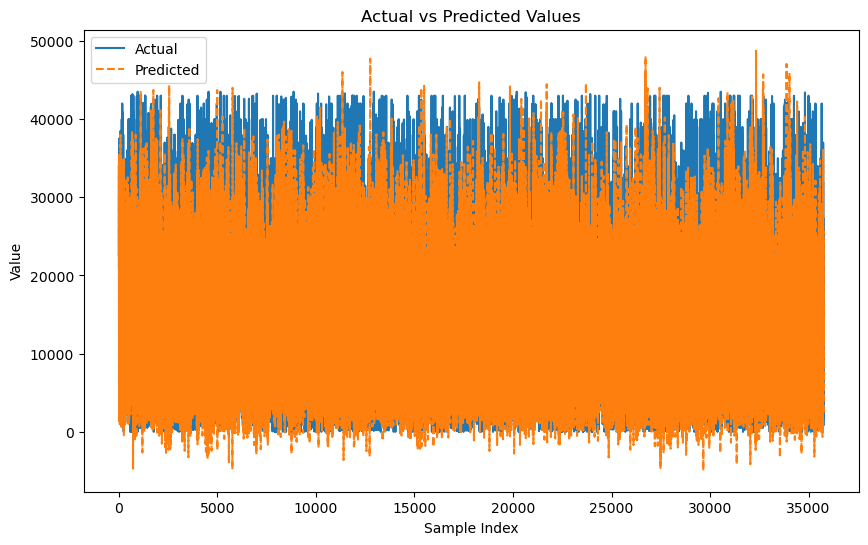

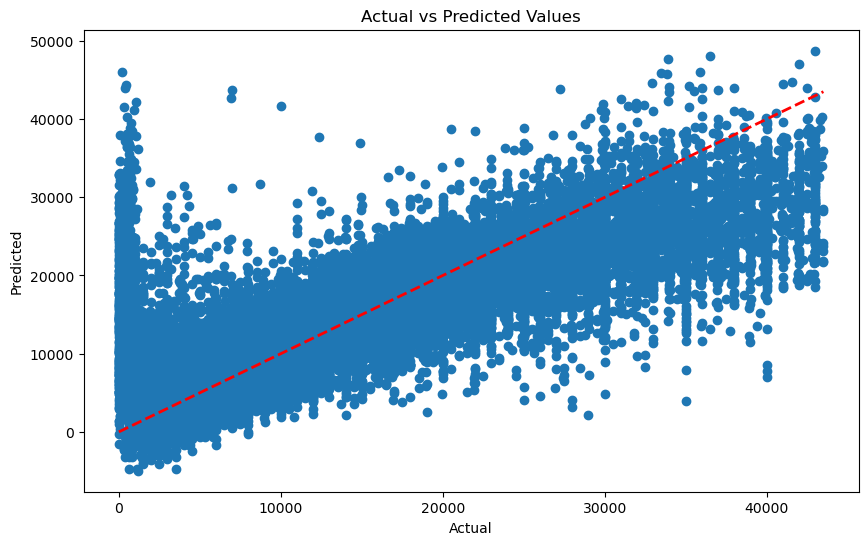

In [162]:
import matplotlib.pyplot as plt

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the comparison
print(comparison_df.head())

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual')
plt.plot(comparison_df['Predicted'].values, label='Predicted', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Scatter plot for better visual comparison
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'])
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

#### Interpret the Model - Permutation Importance

In [164]:
from sklearn.inspection import permutation_importance

In [165]:
perm_importance = permutation_importance(model, X_test_fx, y_test, n_repeats=10, random_state=42)

In [166]:
# Feature names
feature_names = X_test_fx.columns.tolist()

# Mean importances over repeats
mean_importance = perm_importance.importances_mean

# Combine feature names and importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': mean_importance})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
39,vehicle_age,5.100081e-01
40,make_model,1.334417e-01
38,odometer,8.721068e-02
1,cylinders_ord,6.423539e-02
44,vehicle_age^2,3.677826e-02
5,fuel_diesel,2.021455e-02
45,vehicle_age make_model,1.685122e-02
22,type_sedan,7.791973e-03
2,title_status_ord,6.522959e-03
43,odometer make_model,5.826448e-03


In [167]:
importance_df['Feature'].unique()

array(['vehicle_age', 'make_model', 'odometer', 'cylinders_ord',
       'vehicle_age^2', 'fuel_diesel', 'vehicle_age make_model',
       'type_sedan', 'title_status_ord', 'odometer make_model',
       'condition_ord', 'fuel_gas', 'type_SUV', 'drive_ord',
       'type_convertible', 'size_ord', 'type_pickup', 'type_mini-van',
       'type_truck', 'odometer vehicle_age', 'fuel_other',
       'type_hatchback', 'paint_color_black', 'transmission_manual',
       'paint_color_white', 'transmission_automatic', 'type_wagon',
       'make_model^2', 'type_van', 'type_offroad', 'paint_color_custom',
       'type_coupe', 'paint_color_silver', 'type_other', 'type_bus',
       'paint_color_blue', 'fuel_hybrid', 'paint_color_grey',
       'transmission_other', 'paint_color_purple', 'paint_color_brown',
       'odometer^2', 'paint_color_green', 'paint_color_red',
       'fuel_electric', 'paint_color_orange', 'paint_color_yellow'],
      dtype=object)

In [168]:
# drop negative importance columns and retest the model
X_train_fx2 = X_train_fx.drop(columns=['odometer^2', 'paint_color_green', 'paint_color_red',
       'fuel_electric', 'paint_color_orange', 'paint_color_yellow'])

In [169]:
X_train_fx2.shape

(143023, 41)

In [170]:
# drop negative importance columns and retest the model
X_test_fx2 = X_test_fx.drop(columns=['odometer^2', 'paint_color_green', 'paint_color_red',
       'fuel_electric', 'paint_color_orange', 'paint_color_yellow'])

In [171]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_fx2, y_train)
    y_pred = model.predict(X_test_fx2)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: RMSE = 5675.6693, R2 = 0.6510
Ridge: RMSE = 5675.6696, R2 = 0.6510
Lasso: RMSE = 5676.2251, R2 = 0.6510


In [172]:
# Not much difference after dropping columns that had negative permutation importance.

In [173]:
X_train.columns

Index(['condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'make_model',
       'vehicle_age'],
      dtype='object')

## Conclusion
In conclusion, this project focused on predicting used car prices using a structured approach based on the CRISP-DM framework. We started with understanding business objectives and data collection, followed by thorough data preparation, modeling, evaluation, and deployment phases. Here's a summary of our findings and actionable insights:

### Interesting Findings

| Feature      | Recommendation                                                                 | Coefficient Value          | Impact   | Interpretation                                                              |
|--------------|-------------------------------------------------------------------------------|----------------------------|----------|----------------------------------------------------------------------------|
| Fuel         | Collect more data on electric and hybrid models, and consider offering incentives for fuel-efficient options | Diesel - 4892.09          | High     | Fuel type Diesel is associated with higher prices, with electric and hybrid models also contributing to higher prices |
| Type         | Focus on marketing convertibles, offroad, pickup, truck, and coupe models     | Convertible - 2707.22      | High     | Convertibles, offroad, pickup trucks, trucks, and coupes are associated with higher prices |
| Make, Model  | Highlight popular makes and models in listings                                | 2539.73                    | High     | Certain makes and models can drastically increase the price                |
| Cylinders    | Emphasize performance aspects in high-cylinder vehicles                       | 1398.6                     | Medium   | Vehicles with more cylinders are often high-performance and can command higher prices |
| Condition    | Ensure accurate and detailed condition reports                                | 759.02                     | Medium   | Better condition typically results in higher prices                        |
| Odometer     | Highlight vehicles with lower mileage prominently                             | -2013                      | High     | Higher mileage significantly reduces the price                              |
| Title Status | Consider investigating the reasons for price differences and provide clear title status information | 1007.08                    | Medium   | Clear title status increases the vehicle's price                            |
| Transmission | Promote manual transmissions and educate buyers on their benefits             | Manual: 734, Auto: -643    | Medium   | Manual transmissions increase the price, while automatic transmissions slightly reduce it |
| Drive        | Highlight the benefits of specific drive types, such as 4WD                   | 575.37                     | Low      | Certain drive types (e.g., 4WD) can increase the price                      |
| Size         | Emphasize the advantages of larger vehicle sizes in listings                  | 428.59                     | Low      | Larger vehicle sizes can lead to a price increase                           |
| Paint Color  | Consider studying the popularity of colors in the market and highlight desirable colors | Yellow: 658, Custom: 599 | Low      | Popular or unique colors can increase the price                             |
| Vehicle Age  | Provide maintenance records and emphasize longevity for older vehicles        | -4832.72                   | Very High| Older vehicles significantly decrease in price                              |



## Actionable Insights

- **Optimize Pricing Strategy:**
    - Implement dynamic pricing based on mileage, vehicle age, and demand to maximize profits.
    - Monitor regional trends and adjust prices to align with local market conditions.
- **Enhance Inventory Management:**
    - Focus on high-demand models and manufacturers with strong resale value.
    - Use predictive models to forecast inventory turnover and manage stock levels efficiently.
- **Improve Customer Engagement:**
    - Tailor marketing efforts to highlight popular features like low mileage and specific models.
    - Provide transparent pricing and detailed vehicle histories to build trust and attract buyers.
- **Continuous Model Refinement:**
    - Regularly update the predictive model with new data to maintain accuracy.
    - Incorporate user feedback and market insights to enhance model performance.

By leveraging these insights, our business can improve its competitive edge, drive revenue growth, and enhance customer satisfaction.